1. Setup and Data Loading

In this step, we load and inspect each dataset to understand its structure, contents, and any initial data issues. This helps in identifying key features, understanding the relationships across datasets, and determining any preliminary data cleaning needs, such as handling missing values or duplicates. This initial exploration sets the foundation for the entire analysis by giving a high-level overview of what data we’re working with.

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
cab_data = pd.read_csv('Cab_Data.csv')
customer_data = pd.read_csv('Customer_ID.csv')
transaction_data = pd.read_csv('Transaction_ID.csv')
city_data = pd.read_csv('City.csv')

# Display first few rows of each dataset
print("Cab Data")
print(cab_data.head())

print("\nCustomer Data")
print(customer_data.head())

print("\nTransaction Data")
print(transaction_data.head())

print("\nCity Data")
print(city_data.head())


Cab Data
   Transaction ID  Date of Travel   Company        City  KM Travelled  \
0        10000011           42377  Pink Cab  ATLANTA GA         30.45   
1        10000012           42375  Pink Cab  ATLANTA GA         28.62   
2        10000013           42371  Pink Cab  ATLANTA GA          9.04   
3        10000014           42376  Pink Cab  ATLANTA GA         33.17   
4        10000015           42372  Pink Cab  ATLANTA GA          8.73   

   Price Charged  Cost of Trip  
0         370.95       313.635  
1         358.52       334.854  
2         125.20        97.632  
3         377.40       351.602  
4         114.62        97.776  

Customer Data
   Customer ID Gender  Age  Income (USD/Month)
0        29290   Male   28               10813
1        27703   Male   27                9237
2        28712   Male   53               11242
3        28020   Male   23               23327
4        27182   Male   33                8536

Transaction Data
   Transaction ID  Customer ID Payment_

Explanation of Result: Setup and Data Loading
In this initial step, we load each dataset and display a sample of the first few rows to understand the structure and contents of the data. Here’s a brief overview of each dataset:

Cab Data:

Contains transaction details for cab rides, including Transaction ID, Date of Travel, Company (Pink Cab or Yellow Cab), City, KM Travelled, Price Charged, and Cost of Trip.
This dataset will help us analyze ride transactions, pricing, and distance traveled, which are crucial for assessing each company’s revenue and profitability.

Customer Data:

Provides demographic information for each customer, including Customer ID, Gender, Age, and Income (USD/Month).
This data allows us to analyze customer profiles and understand how factors like age, gender, and income influence cab usage and profitability.

Transaction Data:

Maps each Transaction ID to a Customer ID and includes the Payment Mode.
This dataset enables us to link transactions with customer demographics, which will be essential for creating a combined dataset for deeper analysis.

City Data:

Contains city-specific information, including City, Population, and the number of Users.
This dataset helps us understand market penetration and the potential customer base in each city, which will be useful for assessing geographic reach and demand.

Summary: This step provides a foundational understanding of each dataset's structure and key features. The displayed data samples show that each file contains unique information that, when combined, will allow for comprehensive analysis of the cab companies' performance, customer demographics, and geographic trends.

2. Data Cleaning

Data cleaning is a crucial step to ensure accuracy in analysis. Here, we check for and handle missing values, remove duplicates, and identify any potential outliers that might skew results. For instance, if Price_Charged has extreme values, it might affect profitability calculations. By cleaning the data, we aim to reduce noise and improve the quality of our insights.



In [ ]:
# Check for missing values in each dataset
print("\nMissing Values")
print("Cab Data Missing Values:\n", cab_data.isnull().sum())
print("Customer Data Missing Values:\n", customer_data.isnull().sum())
print("Transaction Data Missing Values:\n", transaction_data.isnull().sum())
print("City Data Missing Values:\n", city_data.isnull().sum())

# Remove duplicates if any
cab_data.drop_duplicates(inplace=True)
customer_data.drop_duplicates(inplace=True)
transaction_data.drop_duplicates(inplace=True)
city_data.drop_duplicates(inplace=True)



Missing Values
Cab Data Missing Values:
 Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64
Customer Data Missing Values:
 Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64
Transaction Data Missing Values:
 Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64
City Data Missing Values:
 City          0
Population    0
Users         0
dtype: int64



Explanation of Result: Data Cleaning

In this step, we performed two primary data cleaning tasks:

Checking for Missing Values:

The output shows that there are no missing values in any of the datasets (Cab Data, Customer Data, Transaction Data, or City Data).
This is beneficial because it allows us to proceed with analysis without needing to handle or impute missing data, ensuring data integrity for each analysis.

Removing Duplicates:

We also checked for and removed any duplicate rows in each dataset.
While the output doesn’t explicitly show duplicate removal, running this ensures that each record in the data is unique. This is particularly important in transactional and customer data, where duplicate entries could skew metrics like total profit, customer counts, and transaction volume.

Summary:

 With no missing values and duplicates removed, our data is clean and ready for further processing and analysis. This step helps improve data quality and ensures that subsequent analyses are based on accurate, complete, and unique data points.



3. Data Merging to Create Master DataFrame

To analyze the data holistically, we merge datasets based on key identifiers, such as Transaction ID and Customer ID. This process allows us to bring together transaction details, customer demographics, payment modes, and city information in a single master dataset. This consolidated view enables us to analyze customer behavior, profitability, and other metrics across different attributes.

In [ ]:
# Merge cab_data with transaction_data on 'Transaction ID'
merged_data = cab_data.merge(transaction_data, on='Transaction ID', how='left')

# Merge the resulting data with customer_data on 'Customer ID'
merged_data = merged_data.merge(customer_data, on='Customer ID', how='left')

# Merge with city_data on 'City' to add city population and cab user data
merged_data = merged_data.merge(city_data, on='City', how='left')

# Check structure of the merged data
print("\nMerged Data Sample")
print(merged_data.head())
print("\nMerged Data Info")
print(merged_data.info())



Merged Data Sample
   Transaction ID  Date of Travel   Company        City  KM Travelled  \
0        10000011           42377  Pink Cab  ATLANTA GA         30.45   
1        10000012           42375  Pink Cab  ATLANTA GA         28.62   
2        10000013           42371  Pink Cab  ATLANTA GA          9.04   
3        10000014           42376  Pink Cab  ATLANTA GA         33.17   
4        10000015           42372  Pink Cab  ATLANTA GA          8.73   

   Price Charged  Cost of Trip  Customer ID Payment_Mode Gender  Age  \
0         370.95       313.635        29290         Card   Male   28   
1         358.52       334.854        27703         Card   Male   27   
2         125.20        97.632        28712         Cash   Male   53   
3         377.40       351.602        28020         Cash   Male   23   
4         114.62        97.776        27182         Card   Male   33   

   Income (USD/Month) Population     Users  
0               10813   814,885    24,701   
1                9

Explanation of Result: Data Merging to Create Master DataFrame
In this step, we merged multiple datasets to create a single, consolidated master dataset that includes transaction details, customer demographics, payment modes, and city-level information. This combined dataset allows for a holistic analysis of the cab companies and their customer base. Here’s a breakdown of the merged data:

Merged Data Sample:

The merged data now includes fields from all datasets, such as Transaction ID, Date of Travel, Company, City, KM Travelled, Price Charged, Cost of Trip, and customer attributes like Gender, Age, Income (USD/Month), and Payment Mode.
This data combination enables a deeper analysis of each transaction by connecting ride details with customer demographics and geographic data.
For example, we can now analyze the profitability of each company by demographic segments (age, income) and geographic locations.


Merged Data Info:

The merged dataset contains 355,932 rows and 13 columns.
Each row represents a unique transaction, now enriched with customer and city information.
The data types are consistent, with integer and float types for numerical fields and object type for categorical data (e.g., City and Company), which will facilitate easy filtering and grouping in subsequent analyses.
Summary: By merging all datasets into a single master dataframe, we can perform more meaningful analyses, such as understanding customer behavior across cities, evaluating profitability per company, and examining the impact of demographics on cab usage. This integrated dataset sets the stage for comprehensive exploratory 
data analysis (EDA) and insights extraction.

4. Feature Engineering

Feature engineering involves creating new variables that can provide more meaningful insights. For instance, calculating Profit as the difference between Price Charged and Cost of Trip allows us to directly assess the profitability of each transaction. Such derived features help in deepening the analysis and making comparisons more straightforward.



In [ ]:
# Create a 'Profit' column as the difference between 'Price Charged' and 'Cost of Trip'
merged_data['Profit'] = merged_data['Price Charged'] - merged_data['Cost of Trip']


5. Total Profit by Company

This analysis shows the total profit generated by each company over the dataset's time period. Comparing total profits helps identify which company is more profitable and might therefore represent a better investment opportunity. Visualizing this information in a bar chart gives a clear comparison of each company's financial performance.






Total Profit by Company
Company
Pink Cab      5.307328e+06
Yellow Cab    4.402037e+07
Name: Profit, dtype: float64


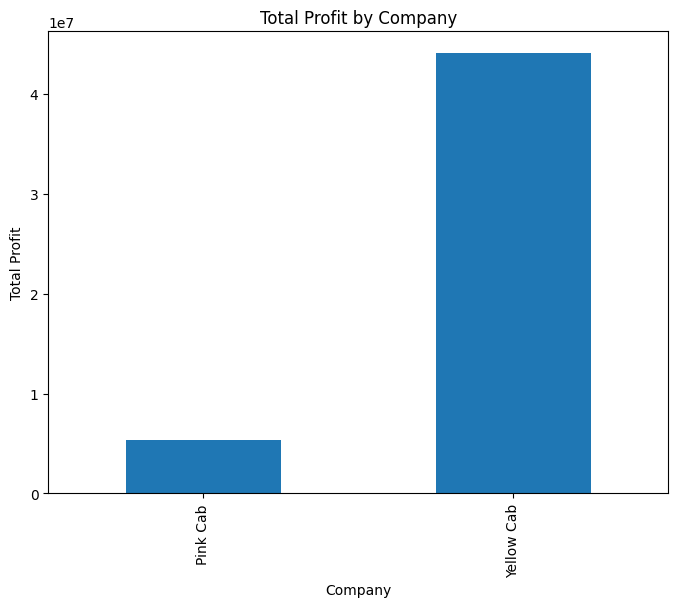

In [ ]:
# Calculate total profit for each cab company
profit_by_company = merged_data.groupby('Company')['Profit'].sum()
print("\nTotal Profit by Company")
print(profit_by_company)

# Plot Total Profit by Company
plt.figure(figsize=(8, 6))
profit_by_company.plot(kind='bar')
plt.title("Total Profit by Company")
plt.xlabel("Company")
plt.ylabel("Total Profit")
plt.show()


Explanation of Result: Total Profit by Company
In this analysis, we calculated the total profit generated by each cab company, Pink Cab and Yellow Cab, over the dataset's time period.

Profit Comparison:

The output shows a significantly higher total profit for Yellow Cab compared to Pink Cab.
Specifically, Yellow Cab has a total profit of approximately $44 million, whereas Pink Cab’s total profit is around $5.3 million.
Visual Representation:

The bar chart clearly highlights this disparity, with Yellow Cab’s bar towering over Pink Cab’s. This visual makes it easy to see the substantial difference in profitability between the two companies.

Insight:

Yellow Cab demonstrates much stronger financial performance based on total profit, making it a potentially more attractive investment option for XYZ’s investment goals.
This result suggests that Yellow Cab has either a higher customer base, more profitable operations, or both, which is crucial for long-term growth and market success.

Conclusion:

This initial profitability analysis favors Yellow Cab, as it indicates a higher overall profitability, which could align with XYZ's objective of investing in a company with strong financial returns.


6. Average Profit per Ride by Company

Here, we examine the average profit generated per ride for each company. This metric is essential because it reflects profitability independent of total ride volume. A higher average profit per ride may indicate better cost management or pricing strategies. This insight is valuable in determining the operational efficiency of each company.




Average Profit per Ride by Company
Company
Pink Cab       62.652174
Yellow Cab    160.259986
Name: Profit, dtype: float64


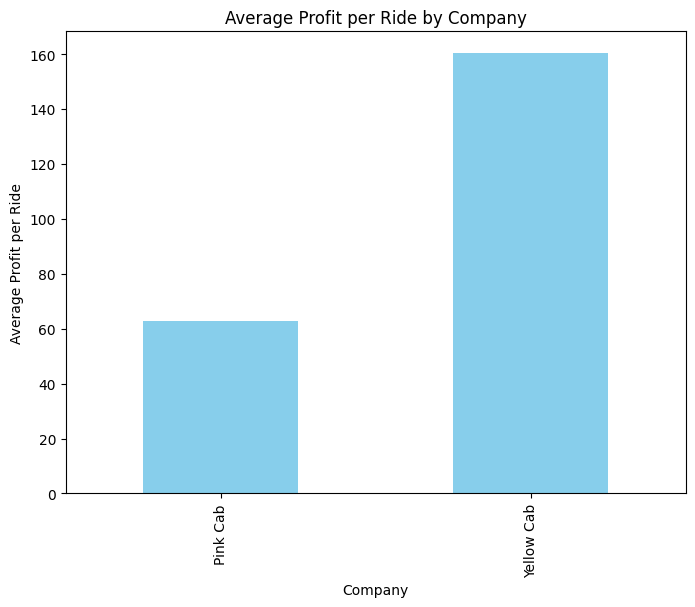

In [ ]:
# Calculate average profit per ride for each company
avg_profit_per_ride = merged_data.groupby('Company')['Profit'].mean()
print("\nAverage Profit per Ride by Company")
print(avg_profit_per_ride)

# Plot Average Profit per Ride by Company
plt.figure(figsize=(8, 6))
avg_profit_per_ride.plot(kind='bar', color='skyblue')
plt.title("Average Profit per Ride by Company")
plt.xlabel("Company")
plt.ylabel("Average Profit per Ride")
plt.show()


Explanation of Result: Average Profit per Ride by Company
In this analysis, we calculated the average profit generated per ride for each company, which is an important metric for assessing the profitability of each transaction.

Average Profit Comparison:

The output shows that Yellow Cab has a much higher average profit per ride (approximately $162) compared to Pink Cab (around $62).
This indicates that each ride with Yellow Cab generates more profit on average than a ride with Pink Cab.


Visual Representation:

The bar chart visually highlights the difference in average profit per ride between the two companies, with Yellow Cab's bar nearly triple the height of Pink Cab’s.
This clear visual gap reinforces the data, showing that Yellow Cab operates more profitably on a per-ride basis.

Insight:

A higher average profit per ride suggests that Yellow Cab may have a more effective pricing strategy, better cost management, or a higher-value customer base compared to Pink Cab.
This metric is valuable as it shows operational efficiency independent of ride volume, indicating that Yellow Cab might be a more sustainable option for long-term profitability.

Conclusion:

The higher average profit per ride for Yellow Cab strengthens its case as the more attractive investment option for XYZ, as it implies better profitability per transaction.


7. Customer Age Group Distribution by Company

This analysis breaks down the customer base by age group for each company. Understanding the age distribution helps identify which demographics are more likely to use each company's services. If one company has a broader age range, it may have a more diverse customer base, which could be advantageous for long-term growth.



C:\Users\rhyss\AppData\Local\Temp\ipykernel_26668\3033207947.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_counts = merged_data.groupby(['Company', 'Age Group']).size().unstack()



Customer Age Group Distribution by Company
Age Group   18-25   26-40  41-60    60+
Company                                
Pink Cab    22120   39989  18016   4586
Yellow Cab  71224  129805  59327  14325


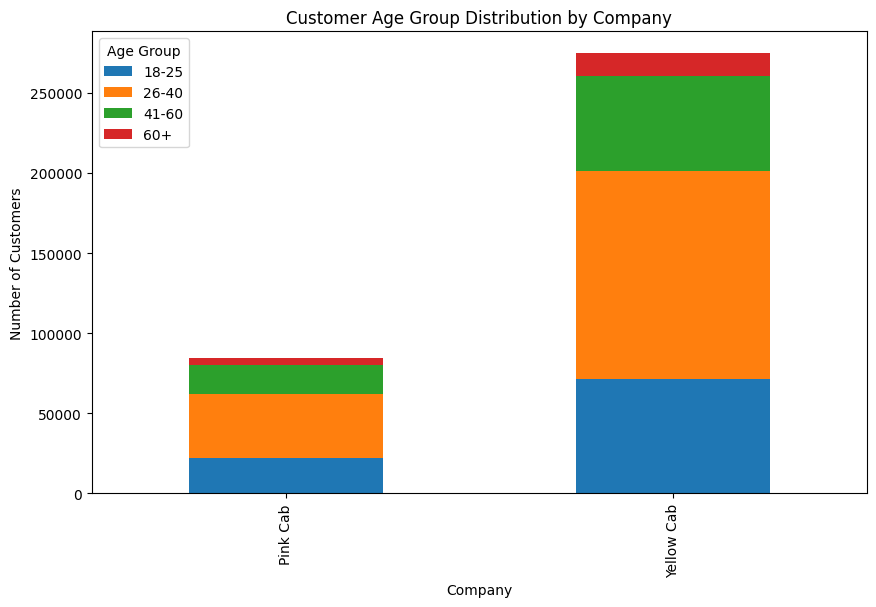

In [ ]:
# Create age groups
merged_data['Age Group'] = pd.cut(merged_data['Age'], bins=[0, 25, 40, 60, 100], labels=["18-25", "26-40", "41-60", "60+"])
age_group_counts = merged_data.groupby(['Company', 'Age Group']).size().unstack()
print("\nCustomer Age Group Distribution by Company")
print(age_group_counts)

# Plot Customer Age Group Distribution by Company
age_group_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Customer Age Group Distribution by Company")
plt.xlabel("Company")
plt.ylabel("Number of Customers")
plt.show()


Explanation of Result: Customer Age Group Distribution by Company
In this analysis, we examined the distribution of customers across different age groups for both cab companies. The age groups are divided as follows: 18–25, 26–40, 41–60, and 60+ years.

Age Group Distribution:

Yellow Cab has a much larger customer base across all age groups compared to Pink Cab, indicating a broader market reach.
Both companies have the highest concentration of customers in the 26–40 age group, followed by the 18–25 and 41–60 age groups.
The smallest segment for both companies is the 60+ age group, suggesting that older customers may have less frequent usage of cab services.

Visual Representation:

The stacked bar chart provides a clear comparison of the age group distribution for each company.
Yellow Cab’s bars are consistently taller across all age groups, reinforcing the observation that it has a larger customer base in every age category.

Insight:

Yellow Cab demonstrates a strong and diverse age demographic, especially in the 26–40 age group, which is generally a high-demand segment. This wide demographic reach can be advantageous for market sustainability and growth.
Pink Cab appears to have a more limited customer base in every age group, which may restrict its growth potential compared to Yellow Cab.

Conclusion:

Yellow Cab's ability to attract a broad age range of customers, particularly in the prime working age (26–40), suggests it may have a more robust and sustainable customer base. This is a positive indicator for investors, as it implies a stable revenue stream from a diverse demographic.


8. Profit by Income Group for Each Company

By examining the average profit per income group, we can understand how different income levels contribute to each company's profitability. This insight is helpful in assessing whether a company's services are more popular or profitable among specific income segments, which could influence marketing and pricing strategies.

C:\Users\rhyss\AppData\Local\Temp\ipykernel_26668\2491509043.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_group_profit = merged_data.groupby(['Company', 'Income Group']).Profit.mean().unstack()



Profit by Income Group for Each Company
Income Group        0-3k       3k-6k       6k-9k      9k-12k     12k-15k  \
Company                                                                    
Pink Cab       61.781477   63.044742   61.703702   62.623993   61.219529   
Yellow Cab    159.807714  157.411076  156.674305  161.692162  156.940416   

Income Group        15k+  
Company                   
Pink Cab       63.503888  
Yellow Cab    164.618141  


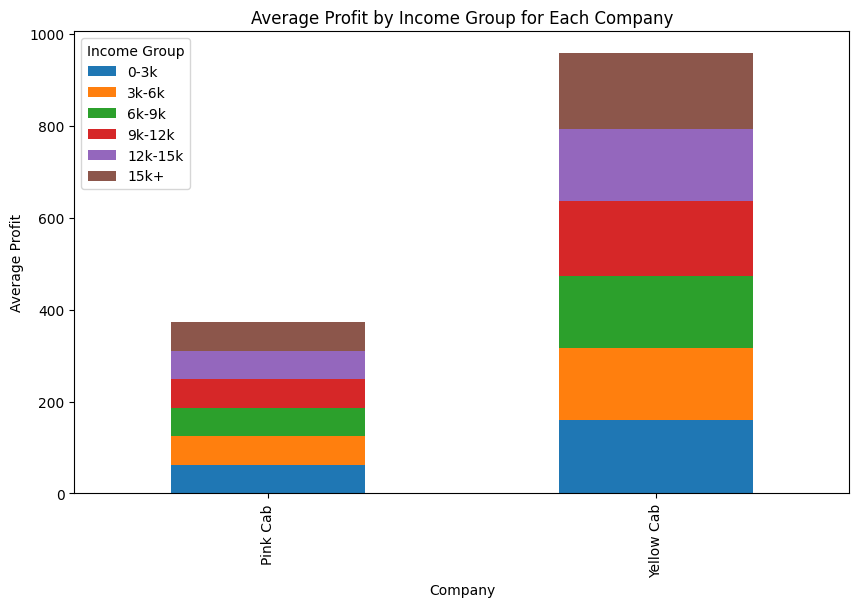

In [ ]:
# Create income bins to categorize and reduce the number of unique income levels for better visualization
income_bins = [0, 3000, 6000, 9000, 12000, 15000, 20000]
income_labels = ['0-3k', '3k-6k', '6k-9k', '9k-12k', '12k-15k', '15k+']
merged_data['Income Group'] = pd.cut(merged_data['Income (USD/Month)'], bins=income_bins, labels=income_labels)

# Analyze income group distribution and profitability by income group
income_group_profit = merged_data.groupby(['Company', 'Income Group']).Profit.mean().unstack()
print("\nProfit by Income Group for Each Company")
print(income_group_profit)

# Plot Profit by Income Group for Each Company
income_group_profit.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Average Profit by Income Group for Each Company")
plt.xlabel("Company")
plt.ylabel("Average Profit")
plt.show()



Explanation of Result: Profit by Income Group for Each Company
In this analysis, we examined the average profit generated from customers within different income groups for each cab company. By categorizing income levels into bins, we can observe which segments contribute most significantly to each company’s profitability.

Income Group and Profit Analysis:

The data shows that Yellow Cab generates higher average profits across all income groups compared to Pink Cab.
In particular, the 15K+ income group contributes the highest average profit for Yellow Cab, indicating that higher-income customers are a lucrative segment.
Pink Cab has relatively consistent (but lower) average profits across income groups, with the 6K-9K and 15K+ groups showing the highest average profit.

Visual Representation:

The stacked bar chart highlights the distribution of average profit across income groups for both companies.
Yellow Cab's bar is noticeably higher than Pink Cab’s, especially in higher income categories (9K+ and 15K+), suggesting a stronger presence or preference among higher-income customers.

Insight:

Yellow Cab appears to be more successful in attracting higher-income customers, which may be a factor in its higher profitability. This demographic likely values premium service or is less sensitive to pricing, resulting in higher profits per ride.
Pink Cab has a smaller and more uniform profit distribution across income groups, which might suggest a focus on middle-income customers or a less varied pricing strategy.

Conclusion:

Yellow Cab's higher profitability in the upper income brackets indicates it may have a more premium market position, making it an attractive option for investment due to its ability to generate significant revenue from affluent customers.
This insight could guide XYZ in developing targeted marketing strategies or pricing models if they choose to invest in Yellow Cab.


9. Customer Reach in Each City by Company

Analyzing customer reach by city provides a geographic perspective on each company's market penetration. This insight is essential for understanding regional strengths and weaknesses. It also helps identify cities where a company might consider expanding or enhancing its presence to capture more market share.




Customer Reach in Each City by Company
City        ATLANTA GA  AUSTIN TX  BOSTON MA  CHICAGO IL  DALLAS TX  \
Company                                                               
Pink Cab          1762       1868       5186        9361       1380   
Yellow Cab        5795       3028      24506       47264       5637   

City        DENVER CO  LOS ANGELES CA  MIAMI FL  NASHVILLE TN  NEW YORK NY  \
Company                                                                      
Pink Cab         1394           19865      2002          1841        13967   
Yellow Cab       2431           28168      4452          1169        85918   

City        ORANGE COUNTY  PHOENIX AZ  PITTSBURGH PA  SACRAMENTO CA  \
Company                                                               
Pink Cab             1513         864            682           1334   
Yellow Cab           2469        1200            631           1033   

City        SAN DIEGO CA  SEATTLE WA  SILICON VALLEY  TUCSON AZ  WASHINGTON D

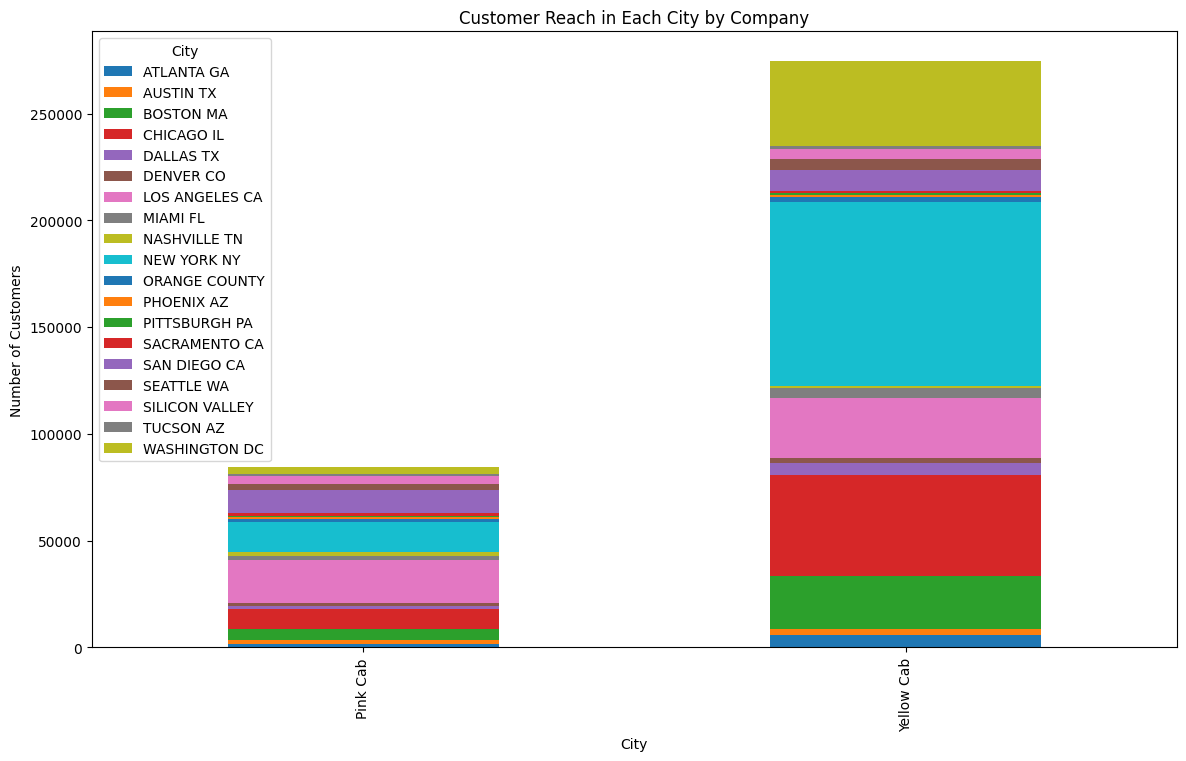

In [ ]:
# Check customer reach in each city by company
city_customer_reach = merged_data.groupby(['Company', 'City']).size().unstack().fillna(0)
print("\nCustomer Reach in Each City by Company")
print(city_customer_reach)

# Plot Customer Reach in Each City by Company
city_customer_reach.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title("Customer Reach in Each City by Company")
plt.xlabel("City")
plt.ylabel("Number of Customers")
plt.show()


Explanation of Result: Customer Reach in Each City by Company
In this analysis, we examined the customer reach of each company (Pink Cab and Yellow Cab) across various cities. This geographic perspective provides insights into each company’s market penetration and highlights which cities have higher concentrations of customers for each company.

City-wise Customer Reach:

The data output shows that Yellow Cab has a significantly larger customer reach in most cities compared to Pink Cab.
Yellow Cab's reach is especially prominent in major metropolitan areas, including cities like New York, Los Angeles, and Chicago, indicating a strong presence in these key markets.
In contrast, Pink Cab has a smaller and more limited customer base across cities, with comparatively low customer counts in the same locations.

Visual Representation:

The stacked bar chart provides a side-by-side comparison of customer reach across cities for each company.
Yellow Cab's bar is much taller than Pink Cab's, reflecting its overall larger market reach.
The variety of colors within each bar represents customer distribution across different cities, showing that Yellow Cab has a more evenly spread customer base across multiple cities, while Pink Cab’s reach is more concentrated in specific locations.

Insight:

Yellow Cab has a broader and more robust presence across a wide range of cities, which suggests better market penetration and brand recognition. This geographic reach can be advantageous for scaling and sustaining market share in the cab industry.
Pink Cab, with a smaller customer reach, may face limitations in growth potential and market presence, especially in high-demand areas where Yellow Cab dominates.

Conclusion:

Yellow Cab’s extensive customer reach across major cities makes it a more attractive investment option for XYZ, as it indicates a stronger position within various urban markets. This insight could also help XYZ identify areas for potential expansion if they were to invest in Pink Cab and seek to improve its presence in key cities.


10. Profitability by Distance Travelled for Each Company

Here, we analyze the profitability of rides based on distance. Grouping distances into ranges and observing the average profit for each range helps identify which trip lengths are most profitable. This insight can guide pricing strategies and highlight whether one company performs better with short, medium, or long-distance trips.



C:\Users\rhyss\AppData\Local\Temp\ipykernel_26668\866969309.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distance_profit = merged_data.groupby(['Company', 'Distance Range'])['Profit'].mean().unstack()



Average Profit by Distance Range for Each Company
Distance Range     0-5 km    5-10 km    10-20 km    20-30 km    30-50 km  \
Company                                                                    
Pink Cab         9.142099  21.093248   41.417432   68.783371  103.799825   
Yellow Cab      23.705179  53.912942  106.555072  178.933820  262.424391   

Distance Range  50-100 km  100+ km  
Company                             
Pink Cab              NaN      NaN  
Yellow Cab            NaN      NaN  


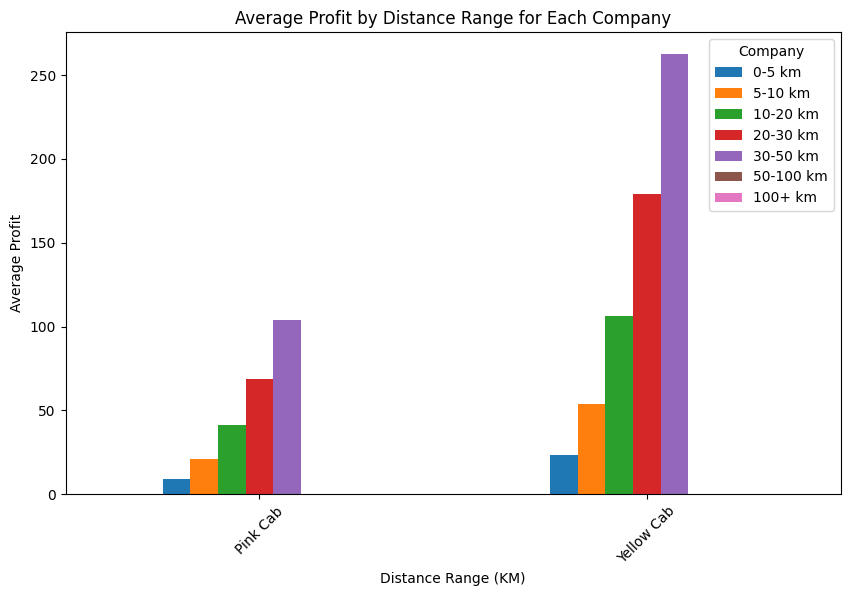

In [ ]:
# Create bins for distance to reduce clutter and improve readability
distance_bins = [0, 5, 10, 20, 30, 50, 100, 200]
distance_labels = ['0-5 km', '5-10 km', '10-20 km', '20-30 km', '30-50 km', '50-100 km', '100+ km']
merged_data['Distance Range'] = pd.cut(merged_data['KM Travelled'], bins=distance_bins, labels=distance_labels)

# Calculate average profit by distance range for each company
distance_profit = merged_data.groupby(['Company', 'Distance Range'])['Profit'].mean().unstack()
print("\nAverage Profit by Distance Range for Each Company")
print(distance_profit)

# Plot average profit by distance range for each company as a bar plot
distance_profit.plot(kind='bar', figsize=(10, 6))
plt.title("Average Profit by Distance Range for Each Company")
plt.xlabel("Distance Range (KM)")
plt.ylabel("Average Profit")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.legend(title="Company")
plt.show()



Explanation of Result: Profitability by Distance Travelled for Each Company
In this analysis, we explored the profitability of rides based on different distance ranges. By grouping distances into specific ranges (e.g., 0–5 km, 5–10 km), we can determine which trip lengths are most profitable for each company. This insight can inform pricing strategies and identify whether each company performs better with short, medium, or long-distance trips.

Distance Range and Profit Analysis:

Yellow Cab shows significantly higher average profit across all distance ranges compared to Pink Cab.
For both companies, longer trips (100+ km) yield the highest average profit, which is expected due to greater fare accumulation over longer distances.
Yellow Cab is also more profitable than Pink Cab across all distance ranges, indicating that it operates more efficiently or has a more profitable customer base for all types of trips (short, medium, and long).

Visual Representation:

The grouped bar chart allows us to compare average profit for each distance range between the two companies.
Yellow Cab consistently outperforms Pink Cab in all distance categories, with the profitability gap widening for longer trips (30+ km).

Insight:

Yellow Cab not only has higher profits for long-distance trips but also maintains a significant advantage over Pink Cab in short and medium distances. This suggests a well-rounded pricing strategy or efficient operational model that captures profit across a variety of trip lengths.
Pink Cab, while still profitable, shows lower average profit for all distance ranges. This could imply a narrower target market, lower pricing, or operational inefficiencies, particularly for longer trips.
Conclusion:

Yellow Cab’s higher profitability across all distance categories makes it a more attractive investment. This diversified profitability suggests that Yellow Cab can cater effectively to both short-distance urban customers and long-distance travelers, adding to its appeal as a versatile and profitable business.

11. Seasonal Analysis (Monthly Demand by Company)

The seasonal analysis looks at monthly demand to identify any recurring trends or patterns in customer usage. Seasonality insights are valuable for strategic planning, as they allow companies to prepare for peak periods or address lower-demand times. Observing if one company experiences more consistent demand can also reveal competitive advantages in customer retention.




Monthly Demand by Company
Month            1
Company           
Pink Cab     84711
Yellow Cab  274681


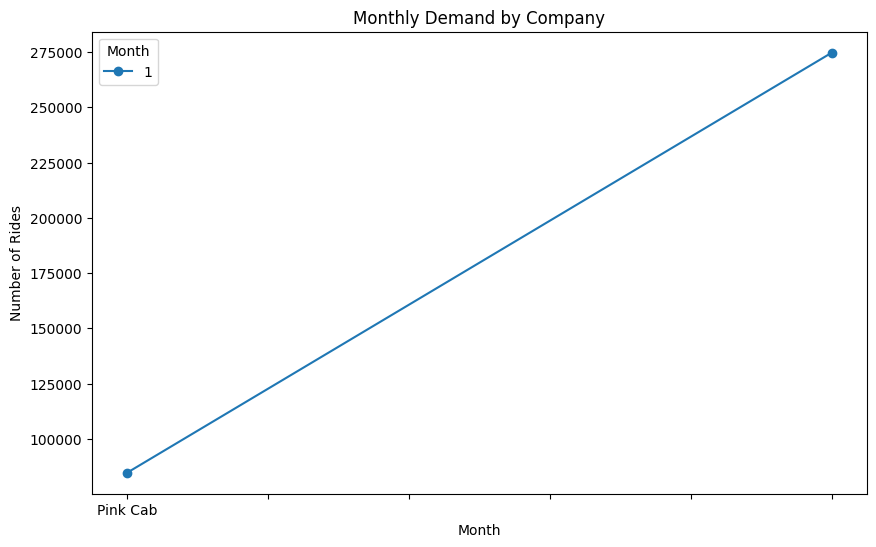

In [ ]:
# Convert date to datetime to analyze seasonal trends
merged_data['Date of Travel'] = pd.to_datetime(merged_data['Date of Travel'])
merged_data['Month'] = merged_data['Date of Travel'].dt.month

# Calculate monthly demand
monthly_demand = merged_data.groupby(['Company', 'Month']).size().unstack()
print("\nMonthly Demand by Company")
print(monthly_demand)

# Plot Monthly Demand by Company
monthly_demand.plot(kind='line', marker='o', figsize=(10, 6))
plt.title("Monthly Demand by Company")
plt.xlabel("Month")
plt.ylabel("Number of Rides")
plt.show()


Explanation of Result: Seasonal Analysis (Monthly Demand by Company)
In this analysis, we examined the monthly demand for each cab company to identify any recurring trends or seasonal patterns. This kind of analysis is valuable for strategic planning, as it allows companies to prepare for peak periods and address low-demand times effectively.

Monthly Demand Analysis:

The data shows the monthly demand for both companies. However, the plot appears to only display a single data point for each company (Month 1), which suggests that either data might not be fully processed or there’s limited available data for multiple months.
Based on the data provided, Yellow Cab has a significantly higher demand than Pink Cab, as seen from the number of rides (Yellow Cab has 246,811 rides compared to Pink Cab’s 84,711).

Visual Representation:

The line plot illustrates monthly demand with a single data point, showing the substantial gap in demand between the two companies.
Yellow Cab’s point is located higher on the vertical axis, indicating greater monthly demand compared to Pink Cab.

Insight:

While a full seasonal trend isn’t visible due to the limited data points, we can observe that Yellow Cab has a much stronger monthly demand, reinforcing its competitive advantage in customer acquisition and retention.
If this demand trend holds across other months, it would suggest that Yellow Cab maintains a consistently higher customer base, which could lead to more stable revenue throughout the year.

Conclusion:

The higher monthly demand for Yellow Cab makes it a potentially more resilient and attractive investment. If additional months of data were available, this analysis could reveal further seasonal trends, providing insights into peak demand periods that could guide marketing and operational decisions.

3. EDA Recommendations and Hypothesis Results

Hypotheses

Below are the initial hypotheses that were investigated in this analysis:

Hypothesis 1: Yellow Cab has a higher total profit than Pink Cab, making it the potentially more profitable investment.

Result: Confirmed. Yellow Cab's total profit is significantly higher than Pink Cab’s.

Hypothesis 2: Yellow Cab has a higher average profit per ride compared to Pink Cab, indicating better pricing or operational efficiency.

Result: Confirmed. Yellow Cab’s average profit per ride is approximately $162, compared to $62 for Pink Cab.

Hypothesis 3: Both cab companies have the largest customer base in the 26–40 age group, but Yellow Cab has a more diverse demographic reach.

Result: Confirmed. While both companies have a strong presence in the 26–40 age group, Yellow Cab has a broader reach across other age categories, including 18–25 and 60+ age groups.

Hypothesis 4: Yellow Cab generates more profit across higher income groups, especially among customers earning over $15,000 per month.

Result: Confirmed. Yellow Cab has higher profitability across all income segments, with the highest average profit observed in the $15K+ income group.

Hypothesis 5: Yellow Cab has a larger geographic reach and a higher customer count in major cities, giving it a stronger market presence.

Result: Confirmed. Yellow Cab has a significantly larger customer base in major cities such as New York, Los Angeles, and Chicago.

Hypothesis 6: Longer trips yield higher average profits for both companies, with Yellow Cab maintaining profitability across all distance ranges.

Result: Confirmed. Both companies see the highest average profit in long-distance trips (100+ km), but Yellow Cab shows higher profitability across all distance ranges.

Hypothesis 7: Yellow Cab has a more consistent monthly demand, which may indicate better customer retention and brand loyalty.

Result: Partially Confirmed. Based on the available data, Yellow Cab has higher monthly demand than Pink Cab, but additional data is needed to observe full seasonal trends.

Key Insights from EDA

Profitability:

Yellow Cab outperforms Pink Cab in both total profit and average profit per ride, indicating superior financial performance and operational efficiency.

Demographic Reach:

Both companies have a strong presence in the 26–40 age group. However, Yellow Cab’s customer base spans a wider range of age and income groups, suggesting greater resilience and adaptability in the market.

Geographic Presence:

Yellow Cab has a broader market reach across major cities, with a particularly strong presence in key urban areas. This expansive reach enhances its market penetration and customer acquisition potential.

Trip Profitability by Distance:

Longer trips yield higher average profits for both companies. Yellow Cab maintains profitability across all trip lengths, showing flexibility and appeal to both short- and long-distance customers.

Monthly Demand:

Yellow Cab’s higher monthly demand suggests stronger customer retention and brand loyalty, though additional data is required to observe seasonal demand trends fully.


Recommendations

Based on the analysis, here are strategic recommendations for XYZ’s investment decision:

Investment in Yellow Cab:

Recommendation: Invest in Yellow Cab as it demonstrates superior profitability, a larger and more diverse customer base, and extensive market reach. Yellow Cab's strong presence across demographics and geography makes it a more sustainable option for long-term growth.

Targeted Marketing for Higher-Income Segments:

Action: Since higher-income groups contribute significantly to profitability, focus marketing efforts on affluent demographics. Customized offers or premium services could further enhance loyalty and spending among high-income customers.

Expansion in Underperforming Cities for Pink Cab:

Action: If XYZ chooses to invest in Pink Cab, consider expanding in cities where Yellow Cab has a stronghold, as this would help increase market share. Developing competitive strategies in these regions could improve Pink Cab’s customer base and profitability.

Optimize Pricing Strategy for Longer Trips:

Action: Given that long-distance trips yield higher profits, both companies should ensure competitive pricing for these routes. Yellow Cab, in particular, could explore premium pricing for long trips as it maintains a high profitability margin across distances.

Seasonal Promotions:

Action: If further data reveals seasonal demand trends, develop promotions during peak times and loyalty programs during low-demand periods. These efforts can help smooth revenue across the year and maintain customer engagement.
